In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

file_path = 'dataset/labeled.csv'
df = pd.read_csv(file_path)

print(df.columns) 

Index(['username', 'review', 'label'], dtype='object')


In [3]:
X = df['review']  
y = df['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
nltk.download('stopwords')
from nltk.corpus import stopwords

indonesian_stopwords = stopwords.words('indonesian')

vectorizer = TfidfVectorizer(stop_words=indonesian_stopwords, max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

[nltk_data] Downloading package stopwords to /home/b401/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/b401/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [5]:
# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

# 3. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

In [6]:
# Evaluasi setiap model
print('Random Forest - Accuracy:', accuracy_score(y_test, rf_pred))
print('Logistic Regression - Accuracy:', accuracy_score(y_test, lr_pred))
print('Naive Bayes - Accuracy:', accuracy_score(y_test, nb_pred))

# Menampilkan classification report untuk evaluasi lebih lanjut
print('\nRandom Forest - Classification Report:')
print(classification_report(y_test, rf_pred))

print('\nLogistic Regression - Classification Report:')
print(classification_report(y_test, lr_pred))

print('\nNaive Bayes - Classification Report:')
print(classification_report(y_test, nb_pred))

Random Forest - Accuracy: 0.8
Logistic Regression - Accuracy: 0.4
Naive Bayes - Accuracy: 0.6

Random Forest - Classification Report:
              precision    recall  f1-score   support

        Baik       1.00      1.00      1.00         4
       Buruk       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.33      0.33      0.33         5
weighted avg       0.80      0.80      0.80         5


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Baik       1.00      0.50      0.67         4
       Buruk       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.33      0.17      0.22         5
weighted avg       0.80      0.40      0.53         5


Naive Bayes - Classification Report:
              precis

/home/b401/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/b401/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/b401/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/b401/.local/lib/python3.10/sit

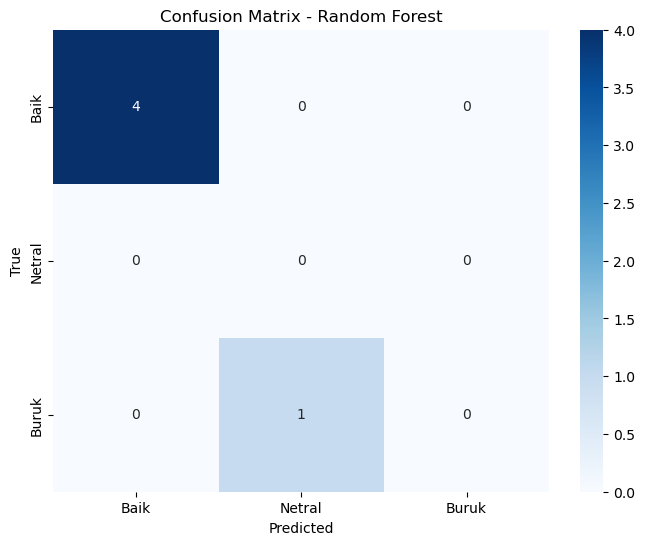

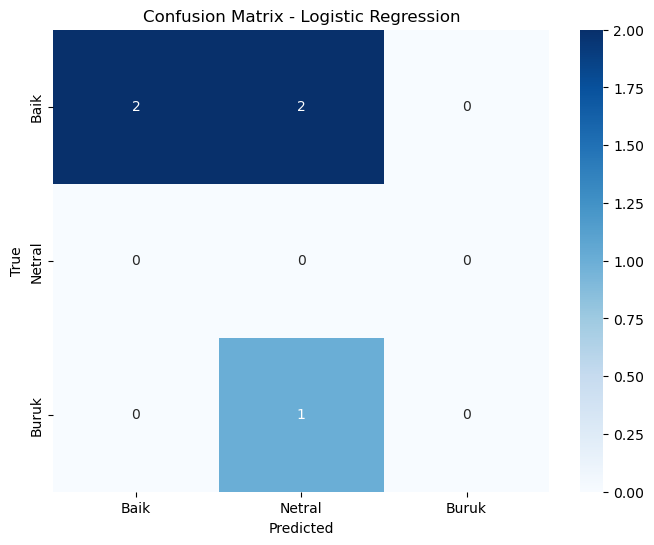

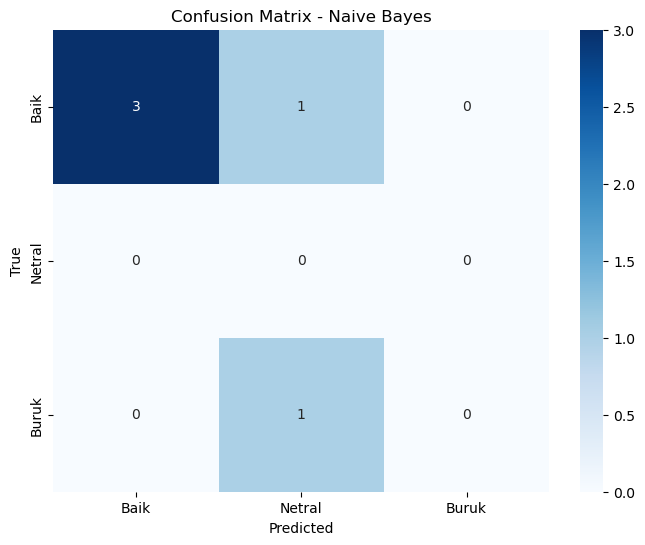

In [15]:
# Menampilkan Confusion Matrix untuk setiap model
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Baik', 'Netral', 'Buruk'], yticklabels=['Baik', 'Netral', 'Buruk'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred, labels=['Baik', 'Netral', 'Buruk'])
plot_confusion_matrix(rf_cm, 'Random Forest')

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred, labels=['Baik', 'Netral', 'Buruk'])
plot_confusion_matrix(lr_cm, 'Logistic Regression')

# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred, labels=['Baik', 'Netral', 'Buruk'])
plot_confusion_matrix(nb_cm, 'Naive Bayes')